# Programming Assignment 3 : Linear Regression

## Instructions:

## Marks: 100
## Due Date: March, 13, 2022 

## Instructions 

*   Submit your code both as notebook file (.ipynb) and python script (.py) on LMS. The name of both files should be 'RollNo_PA3'. Failing to submit any one of them will result in the reduction of marks.

* The datasets required for this assignment have been uploaded to LMS. 

*   The code MUST be implemented independently. Any plagiarism or cheating of work from others or the internet will be immediately referred to the DC.

* 10% penalty per day for 3 days after due date. No submissions will be accepted

after  that.


* Use procedural programming style and comment your code properly.

* **Deadline to submit this assignment is 13/03/2022.**
* Make sure to run all blocks before submission.

### Goal: 

The goal of this assignment is to get you familiar with Linear Regression and to give hands on experience of basic python tools and libraries which will be used in implementing the algorithm.

### Note:

You are <font color="red">not allowed </font> to use scikit-learn or any other machine learning toolkit for part 1 and 2. You have to implement your own Linear Regression model from scratch. You may use Pandas, NumPy, Matplotlib and other standard python libraries


In [1]:
import numpy as np
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt

# Part 1: Simple Linear Regression (10 Marks)

## Dataset: 
The Dataset for this part is provided in the included zip folder within the folder labelled "DataPart1". In case you are doing this assignment on colab, please upload the datafile to colab before starting.

## Pre-Processing:
The dataset you have been provided contains the marketing impact of a company via 3 advertisement mediums (Youtube, Facebook and Newspaper) on their sales. Data is the advertisement budget (in thousands of dollars) along with sales. Before you begin with Simple Linear Regression:
    
<ol>
<li> Plot Budget against Sales for each advertisement medium. </li>
<li> Identify which advertisement media has a linear relationship with Sales </li>
<li> Create a new Pandas data frame to extract this column along with corresponding sales data. </li>
<li> Split the data into train/test sets (80/20 Split).</li>
</ol>


 

Text(0.5, 1.0, 'newspaper vs sales')

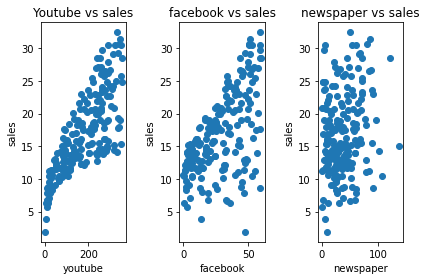

In [2]:
# Plot 3 different scatterplots and do all the required pre-processing.

#Read csv file
df = pd.read_csv('marketing.csv')
#youtube vs sales
plt.rcParams["figure.autolayout"] = True
plt.subplot(1,3,1)
plt.scatter(df['youtube'],df['sales'])
plt.xlabel('youtube')
plt.ylabel('sales')
plt.title('Youtube vs sales')

#facebook vs sales
plt.subplot(1,3,2)
plt.scatter(df['facebook'],df['sales'])
plt.xlabel('facebook')
plt.ylabel('sales')
plt.title('facebook vs sales')

#newspaper vs sales
plt.subplot(1,3,3)
plt.scatter(df['newspaper'],df['sales'])
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.title('newspaper vs sales')



In [3]:
print('youtube column seems to have a linear relationship with sales')

## drop newspaper and facebook columns 
df = df.drop(['facebook','newspaper'],axis = 1)

# splitting data into train/test sets (80/20 Split)
train = df.sample(frac=0.8,random_state=1)
test = df.drop(train.index)


youtube column seems to have a linear relationship with sales


## Tasks:

Implement Linear Regression from scratch to predict the sales of the company based on their advertisement budget for the media you selected. You will implement the following functions:

* Predict function:
    This function calculates the hypothesis for the input sample given the values of weights. 
    \begin{equation*}
        h(x,{\theta}) = \theta_0 + \theta_1 x,
        \end{equation*}

     where $${\theta} \in \mathbb{R}^{2} $$ is the weight vector given by $${\theta} = [ \theta_0, \theta_1]^T $$
    

In [4]:
def predict(X,theta0,theta1):
    # X --> Data point
    return theta0+X*theta1

<li>Mean Square Error Function: This function calculates the cost of using weights as parameters for linear regression. The formula to calculate Mean Square Error is given below:</li>

\begin{equation*}
        J(\theta_0,\theta_1) =\frac{1}{2n} \sum_{i=1}^{n} (\hat{y}^i - y^i)^2,
        \end{equation*}
 where $y^i$ and $\hat{y}^i$ are the actual and predicted labels of the $i$-th training instance respectively and $n$ is the total number of training samples.

In [5]:
def mean_square_error(X,Y,theta0,theta1):
  # X -> data point
  # Y -> True value corresponding to that point X
  return (Y - predict(X,theta0,theta1))**2

* Batch Gradient Descent: This function learns the values of weights when given as parameters the learning rate $\alpha$ and the number of iterations called epoch.
Experiment with different values to determine the best parameters.

For $j=0$ and $j=1$ repeat until convergence \{

$ \qquad \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}  J(\theta_0,\theta_1)$

\}


In [6]:
def gradient_descent(X,Y,alpha,epochs):
    # X -> train_x
    # Y -> train_y 
    
    theta_0 = 0
    theta_1 = 0
    J = list()

    for _ in range(epochs):
      cost=0
      Y_pred=[]
      for i in range(len(X)):
        Y_pred.append(predict(X[i],theta_0,theta_1))
        cost += mean_square_error(X[i],Y[i],theta_0,theta_1)
      cost = (1/(2*len(X))) * cost
      Y_pred = np.array(Y_pred)
      der_theta1  = np.dot(X.T,Y_pred-Y) * (1/(len(X)))
      der_theta0  = np.sum(Y_pred-Y) * (1/(len(X)))
      theta_0 -= alpha*der_theta0
      theta_1 -= alpha*der_theta1
      J.append(cost)
      # Your code
      # Call your predict function.
      # Modify your Theta_0 and Theta_1 accordingly.
      # Append Cost to J

    return J, theta_0, theta_1


In [7]:
alpha=0.00001
epochs=500000

## Make your X = train_x and Y= train_y
X=train['youtube'].to_numpy()
Y=train['sales'].to_numpy()

J,theta0,theta1 = gradient_descent(X,Y,alpha,epochs)
print("Cost after convergence is: ",J[-1])

Cost after convergence is:  8.106143342645856


* Use a value of $\alpha$ $<$ $0.00001$ and epochs $>$ 15000
* Your Minimum Cost on your test set should be around 11-15
 

In [8]:
Y_test_true =  test['sales'].to_numpy()
Y_test_pred = np.dot(test['youtube'].to_numpy(),theta1) + theta0
mse = (1/2)* np.mean((Y_test_true - Y_test_pred)**2)
print('mse of test samples: ',mse)

mse of test samples:  9.463827643722121


### Question: 
Given the data, explain why such a large number of epochs and low learning rate is being used? Explain in terms of data and gradient descent function. Please answer by adding a markdown underneath this question.


Answer: Gradient descent is extremely fast for slightly high values of the learning rate. Thus, low learning rate is used so that gradient descent is slow and gradual. However, to make the algorithm converge, high number of epochs are required because the learning rate is small. There large epochs give algoeithm enough time to converge. 

### Plot Cost against Number of Epochs

Text(0, 0.5, 'cost')

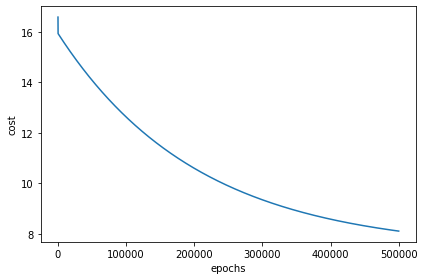

In [9]:
#Plotting
plt.plot(list(range(5,500000)),J[5:len(J)])
plt.xlabel('epochs')
plt.ylabel('cost')

### Plotting Linear Fit

- Using your learned paramters, plot a linear fit of Sales (Y-Axis) against Advertisement Budget (X-Axis).

Plot the original Scatterplot on the same graph as well.

Text(0, 0.5, 'sales')

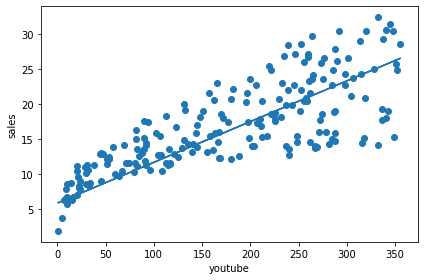

In [10]:
#Plotting
you_budg = df.youtube.to_numpy()
sales_predicted = np.dot(you_budg,theta1) + theta0
plt.plot(you_budg,sales_predicted)
plt.scatter(you_budg,df.sales.to_numpy())
plt.xlabel('youtube')
plt.ylabel('sales')

# Part 2: Multivariate Linear Regression (60 Marks)

Concrete is the most important material in civil engineering. Concrete compressive strength is an extremely important datapoint that engineers take into consideration while making decisions. To physically measure compressive strength is an expensive and costly process and is also dependent on age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate and fine aggregate. 

For this part, we will be prediciting the compressive strength of concrete using the mixture composition and age of a concrete mixture. You will find the data for this part in the folder labelled "DataPart2".

Data Attributes:

* Cement (Component 1) : Kg in a m3 Mixture
* Blast Furnace Slag (Component 2): Kg in a m3 Mixture
* Fly Ash (Component 3): Kg in a m3 Mixture
* Water (Compontnet 4): Kg in a m3 Mixture
* Superplasticizer (Component 5): Kg in a m3 Mixture
* Coarse Aggregate (Component 6): Kg in a m3 Mixture
* Fine Aggregate (Component 7): Kg in a m3 Mixture
* Age: (Days: 1~365)
* Concrete Compressive Strength (Output): MPa


Data Credits: Prof. I-Cheng Yeh


## Tasks:

* You are required to select the best features by drawing Scatter Plots/Heat Maps and using Pearson's correlation coefficent. (You may import a library for this)

* Please justify your selection (Removing any attribute or keeping all attributes) in a markdown box below this one (Add one) 

Answer: Only three features(cement, superplasticizer and age) are chosen because the Pearson's correlation coefficent matrix and scatter plots show that only these chosen features show some sort of relation with the strength of the concrete.  

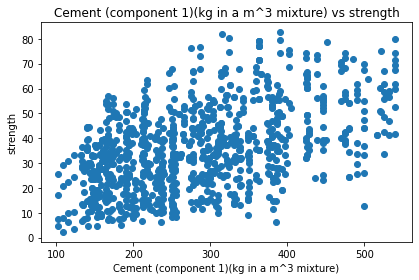

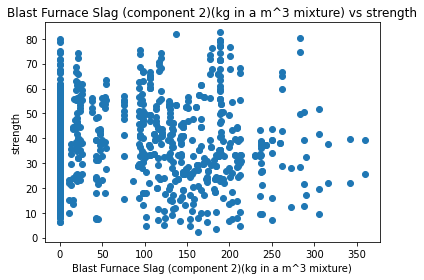

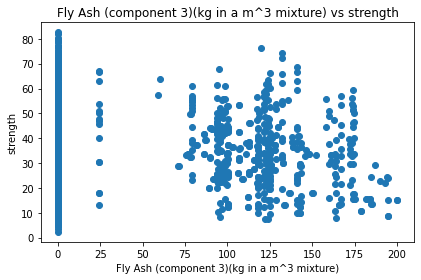

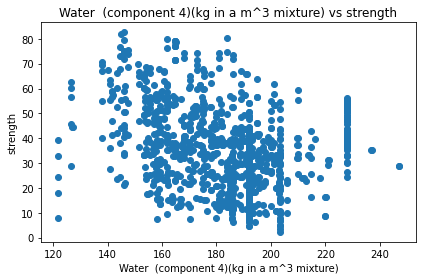

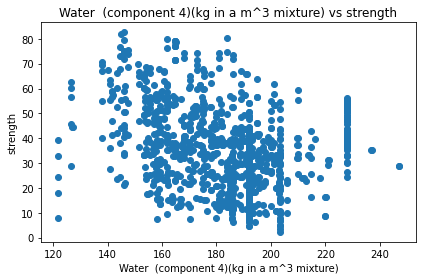

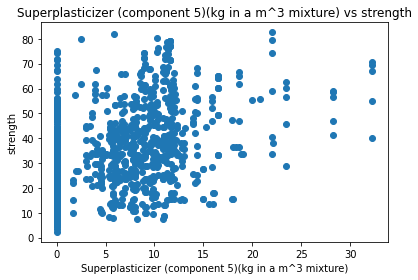

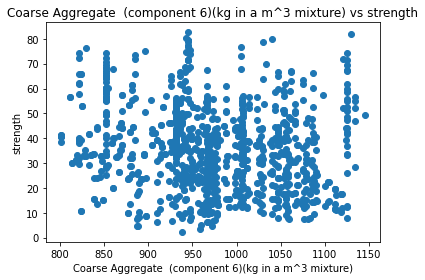

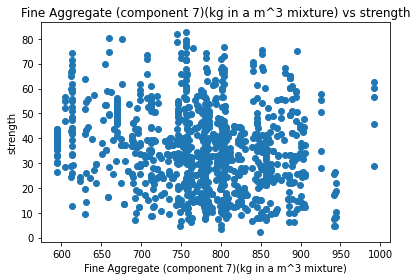

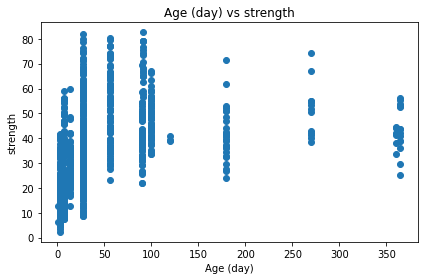

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age (day),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [11]:
## Scatter Plot/Heat Map and Correlation Matrix
#Read csv file
df = pd.read_excel('Concrete.xls')
features = ['Cement (component 1)(kg in a m^3 mixture)','Blast Furnace Slag (component 2)(kg in a m^3 mixture)',\
            'Fly Ash (component 3)(kg in a m^3 mixture)','Water  (component 4)(kg in a m^3 mixture)',\
            'Water  (component 4)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)',\
            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)','Fine Aggregate (component 7)(kg in a m^3 mixture)',\
            'Age (day)']


for i,label in enumerate(features):
  plt.scatter(df[label],df['Concrete compressive strength(MPa, megapascals) '])
  plt.xlabel(label)
  plt.ylabel('strength')
  plt.title(label + ' vs strength')
  plt.show()

correlation = df.corr(method='pearson')
correlation


In [12]:
drop = ['Blast Furnace Slag (component 2)(kg in a m^3 mixture)',\
            'Fly Ash (component 3)(kg in a m^3 mixture)','Water  (component 4)(kg in a m^3 mixture)',\
            'Water  (component 4)(kg in a m^3 mixture)',\
            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)','Fine Aggregate (component 7)(kg in a m^3 mixture)']
df = df.drop(drop,axis = 1)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,2.5,28,79.986111
1,540.0,2.5,28,61.887366
2,332.5,0.0,270,40.269535
3,332.5,0.0,365,41.052780
4,198.6,0.0,360,44.296075


* Data Normalization: Normalize the Dataset by subtracting the mean of each feature from the feature value and then divide by the standard deviation of that feature:

\begin{equation*}
        x_{\rm norm} = \frac{x - {\text{mean}}(x)}{{\rm std}(x)}
    \end{equation*}
(For normalization of test set, use mean and standard deviation of training set.)

In [13]:

# splitting data into train/test sets (80/20 Split)
train = df.sample(frac=0.8,random_state=1)
test = df.drop(train.index)



#Data Normalization

y_column = ['Concrete compressive strength(MPa, megapascals) '] 
features = list(set(list(train.columns))-set(y_column))
df2=train.copy()
train[features] = (train[features]-train[features].mean())/train[features].std()
test[features] = (test[features]-df2[features].mean())/df2[features].std()


* Implement Predict Function, Mean Square Error and Batch Gradient Descent Function as explained in Part 1 for multivariate linear regression.



In [14]:
## Implementation
def predict(X,theta,theta0):
  return np.dot(X,theta)+theta0
def mean_square_error(Y,Y_pred):
  mse = (1/2)* np.mean((Y - Y_pred)**2)
  return mse
def gradient_descent(X,Y,alpha,epochs):
    # X -> train_x
    # Y -> train_y 
    
    theta0 = 0
    theta = np.zeros(3)
    J = list()

    for _ in range(epochs):
      Y_pred = predict(X,theta,theta0)
      cost = mean_square_error(Y,Y_pred)
      der_theta  = np.dot(X.T,Y_pred-Y) * (1/len(Y))
      der_theta0  = np.sum(Y_pred-Y) * (1/len(Y))
      theta0 -= alpha*der_theta0
      theta -= alpha*der_theta
      J.append(cost)
      # Your code
      # Call your predict function.
      # Modify your Theta_0 and Theta_1 accordingly.
      # Append Cost to J

    return J, theta0, theta

In [15]:
alpha=0.00001
epochs=500000

X = train.values[:, 0:3]  # get input values from first two columns
Y = train.values[:, 3]  # get output values from last coulmn

#np.dot(X,np.zeros(3)) + 0
J,theta0,theta = gradient_descent(X,Y,alpha,epochs)
print("Cost after convergence is: ",J[-1])

Cost after convergence is:  70.53735893494323


* Plot the No. of Epochs (y-axis) vs Training Loss (x-axis)

Text(0, 0.5, 'cost')

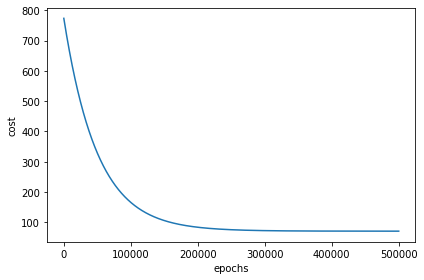

In [16]:
#Plotting
plt.plot(list(range(5,500000)),J[5:len(J)])
plt.xlabel('epochs')
plt.ylabel('cost')

* Measure Mean Square Error of your test set using your learned rate. 


In [17]:
## Measure
Y_test_true =  test.values[:, 3]
X_test =  test.values[:, 0:3]
Y_test_pred = predict(X_test,theta,theta0)
mse = mean_square_error(Y_test_true,Y_test_pred)
print('mse of test samples: ',mse)

mse of test samples:  80.02843354286611


#### Question 1: Mention the best values of Alpha and Numb Of Epochs:

Answer 1:
<ol>
<li> 
Alpha: alpha<=0.00001
</li>
<li> 
Numb of Epochs: epochs>200000
</li>
</ol>

#### Question 2: What is the Mean_Square_Error of your model? Suggest Possible ways to improve the accuracy with a small description of each avenue. 

Answer 2: MSE = 79.7.  Exploratory Data Analysis(EDA) may help in improving the accuracy of the model. Outliers can be deected during eda which would allow the model to work with better accuracy. Moreover, Feature extraction can also result in better performance of the algortihm. Furthermore, having more data can also improve the accuracy.


# Part 3: Regularized Linear Regression (30 Marks)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Regularization is a technique that assumes smaller weights generate simple models and helps avoid overfitting. In this part, you will be using various regularization techniques on the Cement Dataset (Provided in Part 2).


## Tasks:

Implement the least squares [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso),[Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), and [Elastic Net Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) using [scikit-learn](https://scikit-learn.org/stable/index.html). You are required to:

* Try out different values of regularization paramters (alpha in scikit-learn document) and use the validation set to determine the best value of regularization parameter by computing validation loss using [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

* For Ridge Regression and Elastic Net Regression, plot regularization coefficients on the x-axis and learned parameters $\theta$ on the y-axis. Please read this [blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) as reference.

* After evaluating the best value of the regularization parameter, use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to compute the loss on the test set for each regression.

In [19]:
#Read files
df = pd.read_excel('Concrete.xls')

# Normalise
y_column = ['Concrete compressive strength(MPa, megapascals) '] 
features = list(set(list(df.columns))-set(y_column))

df[features] = (df[features]-df[features].mean())/df[features].std()

# Split into test/train
X = df[features].values
Y = df[y_column].values

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


In [20]:
# Implement linear regression
lr = LinearRegression()

lr.fit(X_train,Y_train)

Y_train_predicted= lr.predict(X_train)
mse_train_lr = mean_squared_error(Y_train,Y_train_predicted)
print('mse training(linear regression): ', mse_train_lr)
Y_test_predicted= lr.predict(X_test)
mse_test_lr = mean_squared_error(Y_test,Y_test_predicted)
print('mse test(linear regression): ',mse_test_lr)


mse training(linear regression):  103.47680211171632
mse test(linear regression):  124.88351322372016


MSE training least for small values of alpha


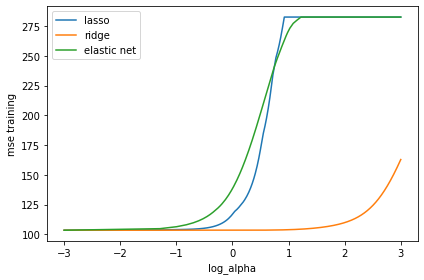

In [21]:
alpha = list(np.arange(0.001,1000,0.05))
mse_val_lasso = []
mse_val_ridge = []
mse_val_en = []
for i,ii in enumerate(alpha):
  #lasso
  lasso = Lasso(alpha=ii)
  lasso.fit(X_train, Y_train) 
  Y_train_predicted_lasso= lasso.predict(X_train)
  mse_val_lasso.append(mean_squared_error(Y_train,Y_train_predicted_lasso))

  #Ridge Regression
  rr = Ridge(alpha=ii)
  rr.fit(X_train, Y_train)
  Y_train_predicted_rr= rr.predict(X_train)
  mse_val_ridge.append(mean_squared_error(Y_train,Y_train_predicted_rr))

  #elastic net
  en = ElasticNet(alpha=ii)
  en.fit(X_train, Y_train) 
  Y_train_predicted_en= en.predict(X_train)
  mse_val_en.append(mean_squared_error(Y_train,Y_train_predicted_en))

#plot lasso mse val vs log alpha
plt.plot(np.log10(alpha),mse_val_lasso,label = 'lasso')
#plot lasso mse val vs log alpha
plt.plot(np.log10(alpha),mse_val_ridge,label = 'ridge')
#plot elastic mse val vs log alpha
plt.plot(np.log10(alpha),mse_val_en,label = 'elastic net')
plt.xlabel('log_alpha')
plt.ylabel('mse training')
plt.legend()
print('MSE training least for small values of alpha')

Text(0.5, 1.0, 'ridge regression')

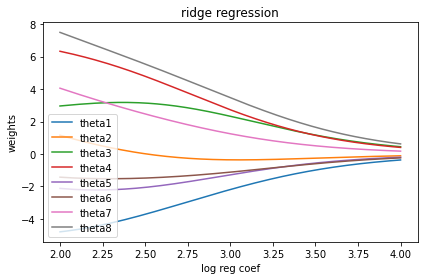

In [22]:
alpha = list(range(100,10000,10))
theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8 = [],[],[],[],[],[],[],[]
for i,ii in enumerate(alpha):
  rr = Ridge(alpha=ii)
  rr.fit(X_train, Y_train)
  theta1.append(rr.coef_[0][0])
  theta2.append(rr.coef_[0][1])
  theta3.append(rr.coef_[0][2])
  theta4.append(rr.coef_[0][3])
  theta5.append(rr.coef_[0][4])
  theta6.append(rr.coef_[0][5])
  theta7.append(rr.coef_[0][6])
  theta8.append(rr.coef_[0][7])

plt.clf()
plt.plot(np.log10(alpha),theta1, label='theta1')
plt.plot(np.log10(alpha),theta2,label='theta2')
plt.plot(np.log10(alpha),theta3,label='theta3')
plt.plot(np.log10(alpha),theta4, label='theta4')
plt.plot(np.log10(alpha),theta5,label='theta5')
plt.plot(np.log10(alpha),theta6,label='theta6')
plt.plot(np.log10(alpha),theta7, label='theta7')
plt.plot(np.log10(alpha),theta8,label='theta8')
plt.xlabel('log reg coef')
plt.ylabel('weights')
plt.legend()
plt.title('ridge regression')




Text(0.5, 1.0, 'Elastic net regression')

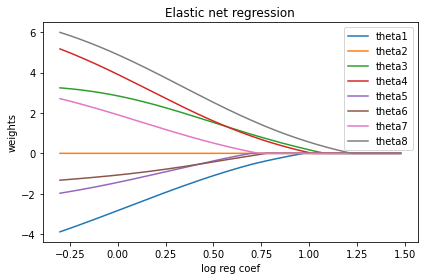

In [23]:

alpha = list(np.arange(0.5,30,0.01))
theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8 = [],[],[],[],[],[],[],[]
for i,ii in enumerate(alpha):
  en = ElasticNet(alpha=ii)
  en.fit(X_train, Y_train)
  theta1.append(en.coef_[0])
  theta2.append(en.coef_[1])
  theta3.append(en.coef_[2])
  theta4.append(en.coef_[3])
  theta5.append(en.coef_[4])
  theta6.append(en.coef_[5])
  theta7.append(en.coef_[6])
  theta8.append(en.coef_[7])

plt.clf()
plt.plot(np.log10(alpha),theta1, label='theta1')
plt.plot(np.log10(alpha),theta2,label='theta2')
plt.plot(np.log10(alpha),theta3,label='theta3')
plt.plot(np.log10(alpha),theta4, label='theta4')
plt.plot(np.log10(alpha),theta5,label='theta5')
plt.plot(np.log10(alpha),theta6,label='theta6')
plt.plot(np.log10(alpha),theta7, label='theta7')
plt.plot(np.log10(alpha),theta8,label='theta8')
plt.xlabel('log reg coef')
plt.ylabel('weights')
plt.legend()
plt.title('Elastic net regression')

In [24]:
#Using alpha 0.001 to predict test Y and calculate mse
#Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train) 
Y_train_predicted_lasso= lasso.predict(X_train)
mse_train_lasso = mean_squared_error(Y_train,Y_train_predicted_lasso)
print('mse train lasso regression : ',mse_train_lasso)

Y_test_predicted_lasso= lasso.predict(X_test)
mse_test_lasso= mean_squared_error(Y_test,Y_test_predicted_lasso)
print('mse test lasso regression : ',mse_test_lasso)

#Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train)
Y_train_predicted_rr= rr.predict(X_train)
mse_train_rr = mean_squared_error(Y_train,Y_train_predicted_rr)
print('mse train ridge regression : ',mse_train_rr)

Y_test_predicted_rr= rr.predict(X_test)
mse_test_rr = mean_squared_error(Y_test,Y_test_predicted_rr)
print('mse test ridge regression : ',mse_test_rr)

#Elastic Net
en = ElasticNet(alpha=0.01)
en.fit(X_train, Y_train) 
Y_train_predicted_en= en.predict(X_train)
mse_train_en = mean_squared_error(Y_train,Y_train_predicted_en)
print('mse train elastic regression : ',mse_train_en)

Y_test_predicted_en= en.predict(X_test)
mse_test_en = mean_squared_error(Y_test,Y_test_predicted_en)
print('mse test elastic net regression : ',mse_test_en)

mse train lasso regression :  103.48726563493007
mse test lasso regression :  124.76353401393372
mse train ridge regression :  103.47680289326979
mse test ridge regression :  124.88206369368588
mse train elastic regression :  103.60759737747371
mse test elastic net regression :  124.36838713579382


### Question: What is the difference between Ridge Regression and Lasso Regression

Ans: Lasso makes some weights equal to zero whereas ridge allows small but non-zero values to less relevant weights. Thus, lasso results in a sparse solution which makes it computationally expensive than ridge regularisation  